# EDA WITH DATA OF INTEREST

In this script we perform an exploratory data analysis before starting to apply time series methods.

In [135]:
# Importing packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [136]:
file_path = "../../data/02_intermediate/"
file_name = "b2-transactions.csv"

filtered_file_name='filtered_transactions_not_clean.csv' # "c1-filtered_transactions.csv"

sep=";"

In [137]:
dict_of_products={'croissant': 100,
                  'croissant petit': 103,
                  'tarta mousse 3 chocolates': 10002,
                  'tarta de manzana 2º': 462,
                  'palmeras de trufa': 182,
                  'tarta opera': 414,
                  'postre fresas y mascarpone': 4511,
                  'milhojas frambuesa 2º': 459,
                  'torteles': 112,
                  'baguette': 115}

In [138]:
filtered_df=pd.read_csv(file_path+filtered_file_name, sep=sep)

In [139]:
filtered_df.describe()

,product_id,section,units_ordered_ok,units_ordered
count,968107.000000,968107.0,0.0,967793.000000
mean,838.743312,0.0,NaN,3.286443
std,1928.252863,0.0,NaN,13.413587
min,45.000000,0.0,NaN,0.000000
25%,103.000000,0.0,NaN,0.000000
50%,182.000000,0.0,NaN,0.000000
75%,459.000000,0.0,NaN,3.000000
max,14998.000000,0.0,NaN,4100.000000


In [140]:
filtered_df.shape

(968107, 9)

In [141]:
filtered_df.head()

,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,units_ordered_ok,date,units_ordered
0,100.0,CROISANTS,0,VeUp,croissant,croissant simple,NaN,2008-01-01,20.0
1,182.0,PALMERAS DE TRUFA,0,VeUp,palmera de trufa,palmera chocolate,NaN,2008-01-01,4.0
2,101.0,CROISSANT,0,VeUp,croissant,croissant simple,NaN,2008-01-01,0.0
3,103.0,CROISSANT PETIT,0,VeUp,croissant petit,croissant petit,NaN,2008-01-01,18.0
4,112.0,TORTELES,0,VeUp,torteles,tortel,NaN,2008-01-01,60.0


In [142]:
filtered_df['target_names_prod_by_prod'].unique()

array(['croissant simple', 'palmera chocolate', 'croissant petit',
       'tortel', 'baguette', 'mousse tres chocolates',
       'milhojas frambuesa', 'tarta opera', 'tarta de manzana',
       'postre de fresas y mascarpone'], dtype=object)

In [143]:
filtered_df[filtered_df['target_names_prod_by_prod']=='frambuesa 2']

,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,units_ordered_ok,date,units_ordered


In [144]:
filtered_df.rename(columns={'Unnamed: 0':'original_index'}, inplace=True)

In [145]:
products=filtered_df['target_names_prod_by_prod'].unique()
stores=filtered_df['store'].unique()

In [146]:
print(stores)

['VeUp' 'MsUP' 'ZiUO' 'AeUP' 'RzUP' 'AaUP' 'LiUP' 'JPUP' 'SeUP' 'MoUP'
 'GoUP' 'BmUP' 'GeUP' 'AnUP' 'PoUP' 'CzUP' 'ViUP' 'EnUP' 'GrUP']


In [147]:
print(products)

['croissant simple' 'palmera chocolate' 'croissant petit' 'tortel'
 'baguette' 'mousse tres chocolates' 'milhojas frambuesa' 'tarta opera'
 'tarta de manzana' 'postre de fresas y mascarpone']


In [148]:
aaa=pd.pivot_table(data=filtered_df,values='units_ordered', index='date', columns=['store','target_names_prod_by_prod'])

In [149]:
aaa.head()

store                         AaUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2008-01-01                    15.0             3.0         2.000000   
2008-01-03                    10.0            10.0         3.000000   
2008-01-04                    15.0            12.0         0.666667   
2008-01-05                    10.0             0.0         2.000000   
2008-01-06                     0.0             0.0         0.000000   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2008-01-01                               0.5                    0.0   
2008-01-03                               0.5                    NaN   
2008-01-04                               2.0                    NaN   
2008-01-05                               4.0                    NaN   
2008-01-06                               4.0                    NaN   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2008-01-01                              5.0                           NaN   
2008-01-03                              2.0                           NaN   
2008-01-04                              0.0                           NaN   
2008-01-05                              0.0                           NaN   
2008-01-06                              0.0                           NaN   

store                                                          ...     ZiUO  \
target_names_prod_by_prod tarta de manzana tarta opera tortel  ... baguette   
date                                                           ...            
2008-01-01                             NaN         NaN    0.0  ...      0.0   
2008-01-03                             NaN         NaN    0.0  ...      0.0   
2008-01-04                             NaN         1.0    0.0  ...      0.0   
2008-01-05                             NaN         NaN    0.0  ...      0.0   
2008-01-06                             NaN         NaN    0.0  ...      0.0   

store                                                                          \
target_names_prod_by_prod croissant petit croissant simple milhojas frambuesa   
date                                                                            
2008-01-01                            0.0              0.0                0.0   
2008-01-03                            0.0              0.0                0.0   
2008-01-04                            0.0              0.0                0.0   
2008-01-05                            0.0              0.0                0.0   
2008-01-06                            0.0              0.0                0.0   

store                                                               \
target_names_prod_by_prod mousse tres chocolates palmera chocolate   
date                                                                 
2008-01-01                                   0.0               0.0   
2008-01-03                                   NaN               0.0   
2008-01-04                                   NaN               0.0   
2008-01-05                                   NaN               0.0   
2008-01-06                                   NaN               0.0   

store                                                                     \
target_names_prod_by_prod postre de fresas y mascarpone tarta de manzana   
date                                                                       
2008-01-01                                          NaN              NaN   
2008-01-03                                          NaN              NaN   
2008-01-04            

In [150]:
aaa.fillna(0.0, inplace=True)

In [151]:
aaa.head()

store                         AaUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2008-01-01                    15.0             3.0         2.000000   
2008-01-03                    10.0            10.0         3.000000   
2008-01-04                    15.0            12.0         0.666667   
2008-01-05                    10.0             0.0         2.000000   
2008-01-06                     0.0             0.0         0.000000   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2008-01-01                               0.5                    0.0   
2008-01-03                               0.5                    0.0   
2008-01-04                               2.0                    0.0   
2008-01-05                               4.0                    0.0   
2008-01-06                               4.0                    0.0   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2008-01-01                              5.0                           0.0   
2008-01-03                              2.0                           0.0   
2008-01-04                              0.0                           0.0   
2008-01-05                              0.0                           0.0   
2008-01-06                              0.0                           0.0   

store                                                          ...     ZiUO  \
target_names_prod_by_prod tarta de manzana tarta opera tortel  ... baguette   
date                                                           ...            
2008-01-01                             0.0         0.0    0.0  ...      0.0   
2008-01-03                             0.0         0.0    0.0  ...      0.0   
2008-01-04                             0.0         1.0    0.0  ...      0.0   
2008-01-05                             0.0         0.0    0.0  ...      0.0   
2008-01-06                             0.0         0.0    0.0  ...      0.0   

store                                                                          \
target_names_prod_by_prod croissant petit croissant simple milhojas frambuesa   
date                                                                            
2008-01-01                            0.0              0.0                0.0   
2008-01-03                            0.0              0.0                0.0   
2008-01-04                            0.0              0.0                0.0   
2008-01-05                            0.0              0.0                0.0   
2008-01-06                            0.0              0.0                0.0   

store                                                               \
target_names_prod_by_prod mousse tres chocolates palmera chocolate   
date                                                                 
2008-01-01                                   0.0               0.0   
2008-01-03                                   0.0               0.0   
2008-01-04                                   0.0               0.0   
2008-01-05                                   0.0               0.0   
2008-01-06                                   0.0               0.0   

store                                                                     \
target_names_prod_by_prod postre de fresas y mascarpone tarta de manzana   
date                                                                       
2008-01-01                                          0.0              0.0   
2008-01-03                                          0.0              0.0   
2008-01-04            

In [152]:
prov=filtered_df.groupby(['target_names_prod_by_prod','date'], as_index=False).sum()[['target_names_prod_by_prod', 'date', 'units_ordered']]

In [153]:
bbb=pd.pivot_table(data=prov,values='units_ordered', index='date', columns='target_names_prod_by_prod')

In [154]:
bbb.fillna(0.0, inplace=True)

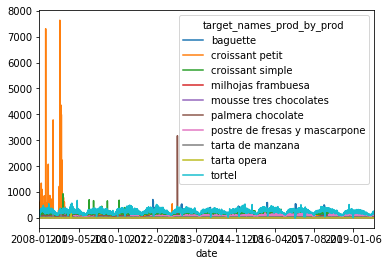

In [155]:
bbb.plot()

In [156]:
bbb.max()

target_names_prod_by_prod
baguette                          711.0
croissant petit                  7634.0
croissant simple                  932.0
milhojas frambuesa                114.0
mousse tres chocolates            125.0
palmera chocolate                3174.0
postre de fresas y mascarpone     236.0
tarta de manzana                  299.0
tarta opera                       273.0
tortel                            676.0
dtype: float64